In [15]:
import nltk
#importing nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
from sklearn.manifold import TSNE
#importing libraries
import nltk
from nltk.tokenize import sent_tokenize
#importing libraries of nltk
from sklearn.cluster import KMeans
#importing libraries KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
#importing libraries sklearn
#importing libraries KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
#sample documents
sport_docs1 = "Manchester United beat Liverpool in a thrilling match"
sport_docs2 = "LeBron James scores 50 points in a Lakers win"
sport_docs3 = "Google rolling out its new AI tool for Gmail and Docs, it can write emails for users"
tech_docs1 = "Across the globe, Apple and its teams find new ways to give"
tech_docs2 = "Google develops a new artificial intelligence system"
tech_docs3 = "Amazon introduces a new smart home device"
climate_docs1 = "Global temperatures reach record highs"
climate_docs2 = "Greenpeace protests against oil drilling in the Arctic"
climate_docs3 = "The United Nations issues a warning on climate change"
# Combining different documents for a particular list
document1s = [sport_docs1, sport_docs2, sport_docs3, tech_docs1, tech_docs2, tech_docs3, climate_docs1, climate_docs2, climate_docs3]
# Tokenizing difefrent documents for sevaral sentences
sentence1s = []
for doc in document1s:
    sentence1s.extend(sent_tokenize(doc))
# Calculating scores for TF-IDF based on sentences
vectorizers = TfidfVectorizer()
X1 = vectorizers.fit_transform(sentence1s)
# Clustering based on the given sentences by applying K-means clustering



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A2G\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Number of minimum clusters
k1 = 3 
models = KMeans(n_clusters=k1, init='k-means++', max_iter=100, n_init=1)
models.fit(X1)
# Predicting the particular cluster to genarte new sentence
new_sentences = "Tesla launches a new electric car model"
new_X1 = vectorizers.transform([new_sentences])
new_clusters = models.predict(new_X1)[0]
# Printing the value of the cluster assignments
for i in range(k1):
    print("Cluster ", i+1, ":")
    for j in range(len(sentence1s)):
        #defining sentences
        if models.labels_[j] == i:
            print(" - ", sentence1s[j])

Cluster  1 :
 -  Manchester United beat Liverpool in a thrilling match
 -  Global temperatures reach record highs
 -  The United Nations issues a warning on climate change
Cluster  2 :
 -  Across the globe, Apple and its teams find new ways to give
 -  Google develops a new artificial intelligence system
 -  Amazon introduces a new smart home device
Cluster  3 :
 -  LeBron James scores 50 points in a Lakers win
 -  Tiger Woods wins the Masters golf tournament
 -  Greenpeace protests against oil drilling in the Arctic


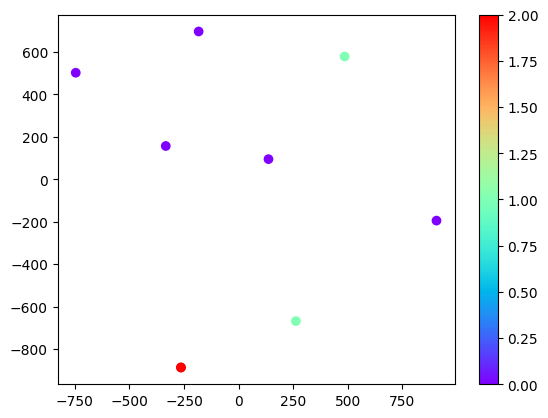

In [13]:
import matplotlib.pyplot as plt
# Calculation on t-SNE embeddings based on the sentence embeddings
X_tsnes = TSNE(n_components=2, perplexity=5).fit_transform(X1.toarray())
# Plot the  scatter plot based on t-SNE embeddings colored by cluster assignment
plt.scatter(X_tsnes[:, 0], X_tsnes[:, 1], c=models.labels_, cmap='rainbow')
plt.colorbar()
#defining color
plt.show()

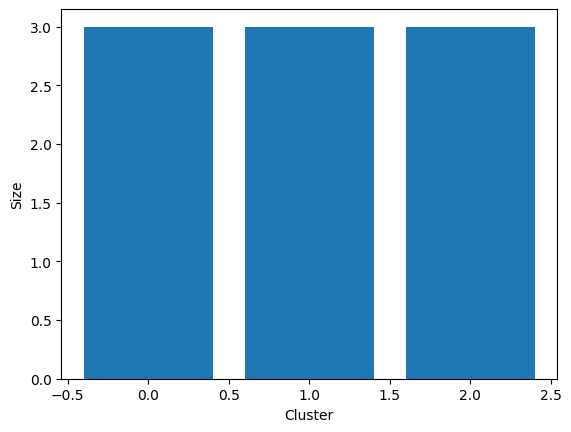

In [18]:
import matplotlib.pyplot as plt
#importing values
# Geting value for each cluster
cluster_size1s = [sum(models.labels_ == i) for i in range(k1)]
#bar chart plotting based on cluster sizes
plt.bar(range(k1), cluster_size1s)
#Defining ranges
plt.xlabel('Cluster')
#defining x
plt.ylabel('Size')
#defining y
plt.show()

In [3]:
from wordcloud import WordCloud
# Generating the cluster
for i in range(k1):
    cluster_sentence1s = [sentence1s[j] for j in range(len(sentence1s)) if models.labels_[j] == i]
    cluster_text1 = ' '.join(cluster_sentence1s)
    wordclouds = WordCloud().generate(cluster_text1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Cluster ' + str(i+1))
    plt.show()

ModuleNotFoundError: No module named 'wordcloud'